In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [5]:
# copy demo into current directory
ac.copydemo('spb')

# start AUTO with runner object
runner = ra.runAUTO()

print("\n***Homotopy from lambda=0 to lambda=1***")
r0 = ac.run(e='spb',c='spb.0',runner=runner)
ac.save(r0,'0')

print("\n***Letting epsilon become small***")
r1 = ac.run(r0,c='spb.1',runner=runner)
r1 = ac.relabel(r1)
ac.save(r1,'1')

print("\n***Continuation in gamma: First 15 steps***")
r2 = ac.run(r1('UZ2'),c='spb.2',runner=runner)

print("\n***Continuation in gamma: Restart***")
r3 = ac.run(r2,c='spb.3',runner=runner)
ac.save(ac.relabel(r2+r3),'2')

Copying demo spb ... done

***Homotopy from lambda=0 to lambda=1***
gfortran -fopenmp -O -c spb.f90 -o spb.o
gfortran -fopenmp -O spb.o -o spb.exe /auto/lib/*.o
Starting spb ...

  BR    PT  TY  LAB    PAR(3)        L2-NORM       MAX U(1)      MAX U(2)   
   1     1  EP    1   0.00000E+00   1.38564E+00   1.50000E+00  -3.00000E-01
   1    14  UZ    2   1.00000E+00   2.05442E+00   1.50000E+00   3.39457E+00

 Total Time    0.405E-01
spb ... done
Saving to b.0, s.0, and d.0 ... done

***Letting epsilon become small***
Starting spb ...

  BR    PT  TY  LAB    PAR(2)        L2-NORM       MAX U(1)      MAX U(2)   
   1    23  UZ    3   1.00000E-02   5.18591E+00   1.50000E+00   1.25243E+01
   1    50  UZ    4   1.00000E-03   1.43306E+01   1.50000E+00   6.77491E+01
   1    88  UZ    5   1.00000E-04   4.40275E+01   1.50000E+00   5.29967E+02
   1   135  UZ    6   1.00000E-05   1.38567E+02   1.50000E+00   4.94402E+03

 Total Time    0.139E+00
spb ... done
Relabeling done
Saving to b.1, s.1, and d.

Created plot


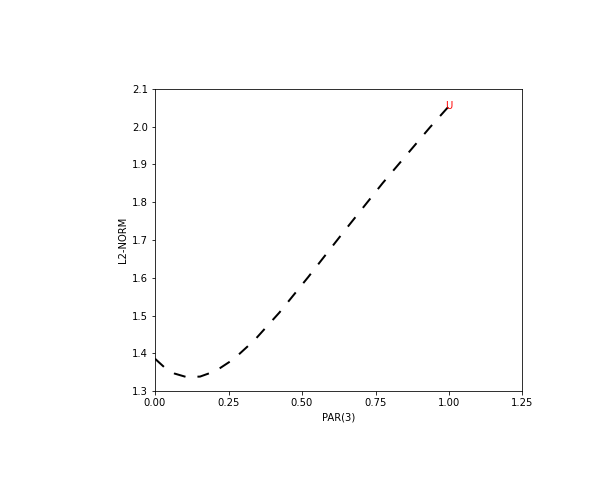

Created plot


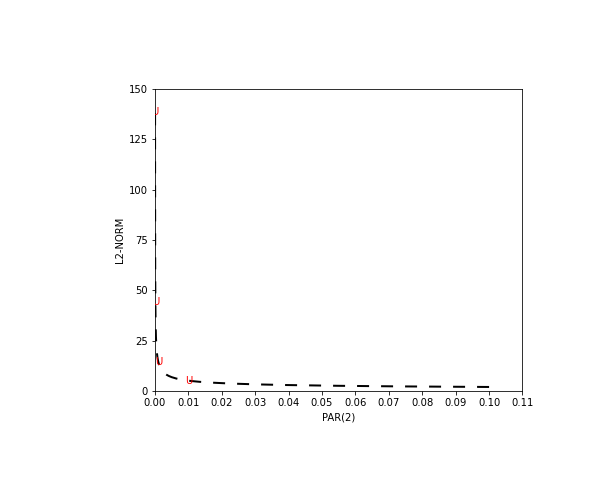

Created plot


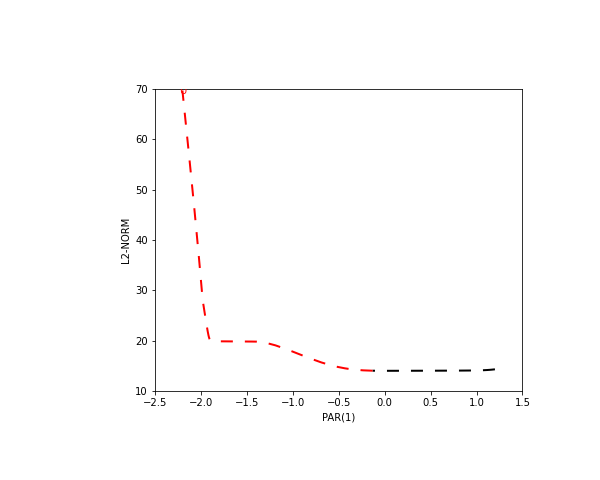

In [8]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot('0')
p.config(stability=True, grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

p = ac.plot('1')
p.config(stability=True, grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

p = ac.plot('2')
p.config(stability=True, grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

In [9]:
# clean up files

ac.clean()
ac.delete('0')
ac.delete('1')
ac.delete('2')

Deleting fort.* *.o *.exe *.*~ ... done
